In [2]:
import numpy as np
import scipy.stats as st
import cv2

import matplotlib.pyplot as plt

In [3]:
class Heatmap:
    """
    class of Heatmap
    """
    def __init__(self, original_data):
        self.original_data = original_data
        self.height = 0
        self.width = 0
        self.columns = 0
        self.rows = 0
        self.row_height = 0
        self.column_width = 0
        self.heatmap = None

    def __get_width_and_height(self):
        """
        get width and height from json file
        :return: width and height
        """
        self.width = int(self.original_data['width'])
        self.height = int(self.original_data['height'])

    def __get_number_of_rows_and_columns(self):
        """
        get number of columns and rows of shelf from json file
        :return: number of columns and rows
        """
        self.rows = int(self.original_data['row'])
        self.columns = int(self.original_data['col'])

    def __get_rowHeight_and_columnWidth(self):
        """
        get row height and columns width
        :return: row height and columns width
        """
        self.__get_width_and_height()
        self.__get_number_of_rows_and_columns()
        self.column_width, self.row_height = self.width / self.columns, self.height / self.rows

    def __generate_original_heatmap(self):
        """
        generate a 2D matrix whose (x,y) is where eye followed
        and whose value is the duration
        :return: a 2D matrix
        """
        self.__get_rowHeight_and_columnWidth()
        original_heatmap = np.zeros((self.height, self.width))
        for d in self.original_data['data']:
            x = int((d['x'] + 0.5) * self.column_width)
            y = int((4 - (d['y']) + 0.5) * self.row_height)
            value = d['value']
            original_heatmap[y][x] += value

        return original_heatmap

    def __generate_original_heatmap_with_exact_coordinates(self):
        """
        adjust the 2D matrix into a new coordinate system
        :return:
        """
        self.__get_rowHeight_and_columnWidth()
        original_heatmap = np.zeros((self.height, self.width))
        for d in self.original_data['data']:
            x = int(d['x'] + 0.5 * self.width)
            y = int(0.5 * self.height - d['y'])
            value = d['value']
            if (x > self.width or y > self.height):
                continue
            original_heatmap[y][x] += value

        return original_heatmap

    def __generate_gaussian_kernel(self, kernlen=100, nsig=3):
        """Returns a 2D Gaussian kernel."""

        x = np.linspace(-nsig, nsig, kernlen + 1)
        kern1d = np.diff(st.norm.cdf(x))
        kern2d = np.outer(kern1d, kern1d)
        return kern2d / kern2d.sum()

    def __blur_original_heatmap_with_gaussian_kernel(self, original_heatmap, gaussian_kernel):
        """
        blur the 2D matrix with generated gaussian kernel
        :param original_heatmap: the 2D matrix
        :param gaussian_kernel:
        :return: real heatmap foreground
        """
        self.heatmap = cv2.filter2D(original_heatmap, -1, gaussian_kernel)

    def generate_heatmap(self):
        """
        main function to generate heatmap
        :return:
        """
        # originalHeatmap = self.__generate_original_heatmap() # removed cause we don't have to adjust coordinate any more
        originalHeatmap = self.__generate_original_heatmap_with_exact_coordinates()
        gaussianKernel = self.__generate_gaussian_kernel()
        self.__blur_original_heatmap_with_gaussian_kernel(originalHeatmap, gaussianKernel)
        return self.heatmap



In [4]:
report1 = {"action":3,"scene":3,"table_id":"heatmap_1","position":"{\"Width\":810.0,\"Height\":460.0,\"Row\":10,\"Col\":30,\"data\":[{\"x\":30,\"y\":135,\"value\":49},{\"x\":40,\"y\":-16,\"value\":1289},{\"x\":73,\"y\":-18,\"value\":430},{\"x\":89,\"y\":-25,\"value\":387},{\"x\":-49,\"y\":-87,\"value\":72},{\"x\":-65,\"y\":-87,\"value\":344},{\"x\":-98,\"y\":-61,\"value\":86},{\"x\":-127,\"y\":132,\"value\":158},{\"x\":-147,\"y\":158,\"value\":3910},{\"x\":-151,\"y\":63,\"value\":1046},{\"x\":-180,\"y\":66,\"value\":3280},{\"x\":-155,\"y\":116,\"value\":258},{\"x\":-176,\"y\":145,\"value\":487},{\"x\":-123,\"y\":158,\"value\":1160},{\"x\":92,\"y\":186,\"value\":229},{\"x\":85,\"y\":179,\"value\":115},{\"x\":74,\"y\":180,\"value\":315},{\"x\":-166,\"y\":110,\"value\":430},{\"x\":-197,\"y\":147,\"value\":487},{\"x\":-190,\"y\":137,\"value\":29},{\"x\":-197,\"y\":51,\"value\":272},{\"x\":-203,\"y\":34,\"value\":530},{\"x\":-184,\"y\":36,\"value\":1003},{\"x\":-165,\"y\":-35,\"value\":129},{\"x\":-156,\"y\":-23,\"value\":888},{\"x\":-124,\"y\":-39,\"value\":644},{\"x\":-130,\"y\":64,\"value\":1174},{\"x\":-125,\"y\":45,\"value\":43},{\"x\":-90,\"y\":58,\"value\":2177},{\"x\":-77,\"y\":8,\"value\":2993},{\"x\":-74,\"y\":75,\"value\":458},{\"x\":-73,\"y\":-29,\"value\":544},{\"x\":-102,\"y\":-4,\"value\":2507},{\"x\":-134,\"y\":-75,\"value\":301},{\"x\":-158,\"y\":-112,\"value\":6058},{\"x\":-169,\"y\":-178,\"value\":3939},{\"x\":-180,\"y\":-187,\"value\":1145},{\"x\":-158,\"y\":-189,\"value\":602},{\"x\":-155,\"y\":-177,\"value\":372},{\"x\":-192,\"y\":-188,\"value\":2349},{\"x\":-196,\"y\":-182,\"value\":72},{\"x\":77,\"y\":-156,\"value\":1532},{\"x\":88,\"y\":-154,\"value\":1446},{\"x\":111,\"y\":-181,\"value\":186},{\"x\":395,\"y\":-185,\"value\":100},{\"x\":390,\"y\":-178,\"value\":358},{\"x\":353,\"y\":-169,\"value\":315},{\"x\":347,\"y\":-170,\"value\":2993},{\"x\":78,\"y\":-99,\"value\":301},{\"x\":60,\"y\":-57,\"value\":1217},{\"x\":132,\"y\":-102,\"value\":258},{\"x\":158,\"y\":-102,\"value\":158},{\"x\":176,\"y\":-110,\"value\":1160},{\"x\":204,\"y\":-107,\"value\":888},{\"x\":281,\"y\":-113,\"value\":415},{\"x\":257,\"y\":-122,\"value\":530},{\"x\":356,\"y\":-113,\"value\":458},{\"x\":349,\"y\":-103,\"value\":143},{\"x\":306,\"y\":-32,\"value\":1046},{\"x\":293,\"y\":-21,\"value\":473},{\"x\":256,\"y\":-6,\"value\":229},{\"x\":196,\"y\":-13,\"value\":730},{\"x\":169,\"y\":-20,\"value\":1547},{\"x\":148,\"y\":-21,\"value\":1017}]}"}
report2 = {"action":3,"scene":3,"table_id":"heatmap_1","position":"{\"Width\":810.0,\"Height\":460.0,\"Row\":10,\"Col\":30,\"data\":[{\"x\":151,\"y\":-51,\"value\":100},{\"x\":333,\"y\":-23,\"value\":1203},{\"x\":300,\"y\":-48,\"value\":43},{\"x\":235,\"y\":-17,\"value\":845},{\"x\":217,\"y\":45,\"value\":57},{\"x\":219,\"y\":60,\"value\":802},{\"x\":216,\"y\":58,\"value\":43},{\"x\":176,\"y\":69,\"value\":358},{\"x\":310,\"y\":65,\"value\":1661},{\"x\":325,\"y\":68,\"value\":172},{\"x\":295,\"y\":39,\"value\":172},{\"x\":296,\"y\":56,\"value\":759},{\"x\":305,\"y\":103,\"value\":358},{\"x\":310,\"y\":149,\"value\":845},{\"x\":330,\"y\":156,\"value\":172},{\"x\":248,\"y\":160,\"value\":2521},{\"x\":291,\"y\":154,\"value\":530},{\"x\":237,\"y\":168,\"value\":1045},{\"x\":170,\"y\":166,\"value\":1919},{\"x\":161,\"y\":160,\"value\":415},{\"x\":-44,\"y\":177,\"value\":329},{\"x\":-65,\"y\":172,\"value\":788},{\"x\":-79,\"y\":186,\"value\":29},{\"x\":-84,\"y\":187,\"value\":72},{\"x\":-97,\"y\":166,\"value\":816},{\"x\":-158,\"y\":41,\"value\":158},{\"x\":-255,\"y\":-160,\"value\":645},{\"x\":-224,\"y\":70,\"value\":1117},{\"x\":-283,\"y\":74,\"value\":429},{\"x\":-320,\"y\":72,\"value\":902},{\"x\":-330,\"y\":72,\"value\":974},{\"x\":-255,\"y\":65,\"value\":1160},{\"x\":-12,\"y\":33,\"value\":673},{\"x\":-23,\"y\":50,\"value\":344},{\"x\":-35,\"y\":-19,\"value\":544},{\"x\":-209,\"y\":-33,\"value\":430},{\"x\":-232,\"y\":-25,\"value\":243},{\"x\":-269,\"y\":-32,\"value\":86},{\"x\":-277,\"y\":-30,\"value\":501},{\"x\":-300,\"y\":-32,\"value\":387},{\"x\":-273,\"y\":-130,\"value\":258},{\"x\":-251,\"y\":-208,\"value\":644},{\"x\":-241,\"y\":-208,\"value\":372},{\"x\":-242,\"y\":-128,\"value\":243},{\"x\":-245,\"y\":-125,\"value\":258},{\"x\":-62,\"y\":-125,\"value\":673},{\"x\":-180,\"y\":-131,\"value\":1346},{\"x\":-104,\"y\":-129,\"value\":372},{\"x\":-19,\"y\":-134,\"value\":129},{\"x\":-18,\"y\":-139,\"value\":516},{\"x\":-49,\"y\":-227,\"value\":215},{\"x\":-273,\"y\":-218,\"value\":1303},{\"x\":-225,\"y\":-180,\"value\":57},{\"x\":127,\"y\":-16,\"value\":1003},{\"x\":106,\"y\":6,\"value\":14},{\"x\":111,\"y\":6,\"value\":43},{\"x\":94,\"y\":-192,\"value\":1590},{\"x\":113,\"y\":-185,\"value\":72},{\"x\":1,\"y\":29,\"value\":43},{\"x\":-2,\"y\":97,\"value\":659},{\"x\":0,\"y\":93,\"value\":115},{\"x\":18,\"y\":209,\"value\":201},{\"x\":-4,\"y\":196,\"value\":100},{\"x\":34,\"y\":209,\"value\":315}]}"}

In [5]:
report1_data= eval(report1['position'])['data']
report2_data= eval(report2['position'])['data']

report1_data.extend(report2_data)

all_data = report1_data

In [6]:
width = int(eval(report1['position'])['Width'])
height = int(eval(report1['position'])['Height'])

row = eval(report1['position'])['Row']
col = eval(report1['position'])['Col']

In [7]:
original_heatmap = np.zeros((height, width))

In [8]:
xs = [d['x'] for d in all_data]

ys = [d['y'] for d in all_data]

values = [d['value'] for d in all_data]

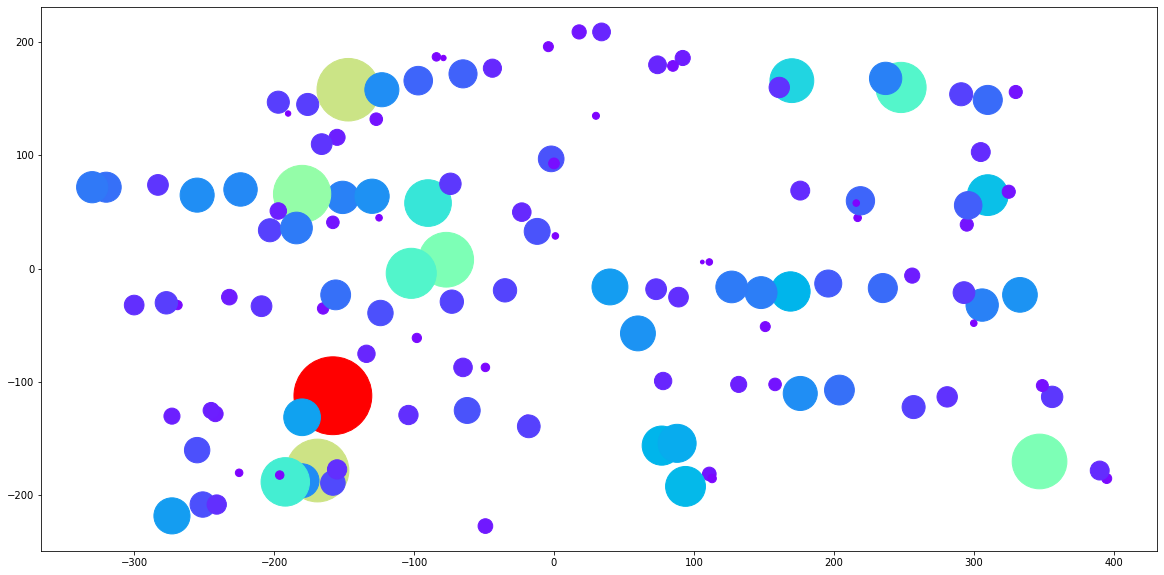

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(x=xs, y=ys, s = values, c = values, cmap = 'rainbow')
plt.show()

In [10]:
for d in all_data:
    x = int(d['x'] + 0.5 * width)
    y = int(0.5 * height - d['y'])
    value = d['value']
    if (x > width or y > height):
        continue
    original_heatmap[y][x] += value

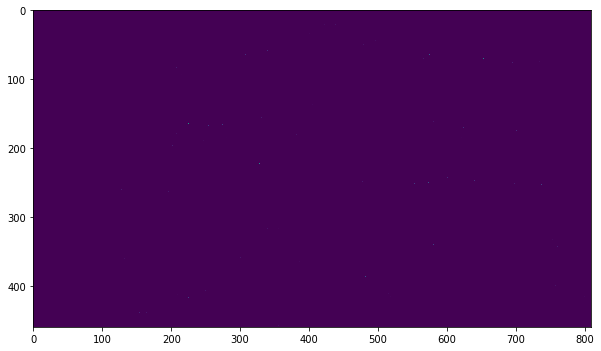

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(original_heatmap)
plt.show()

In [12]:
def generate_gaussian_kernel(kernlen=100, nsig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-nsig, nsig, kernlen + 1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d / kern2d.sum()

In [105]:
kernel = generate_gaussian_kernel(kernlen=69)

In [106]:
heatmap = cv2.filter2D(original_heatmap, -1, kernel)

In [107]:
background = cv2.imread(
    "/Users/pengyuyan/Documents/code/heatmapForEyeTracker/venv/demo/data/Supermart5LessonBK1.PNG")
foreground = heatmap

In [108]:
foreground_color = np.zeros_like(background)
foreground_color[:, :, 0] = foreground
foreground_color[:, :, 1] = foreground
foreground_color[:, :, 2] = foreground

In [109]:
blender = cv2.addWeighted(foreground_color * 255, 0.5, background, 0.5, 0)

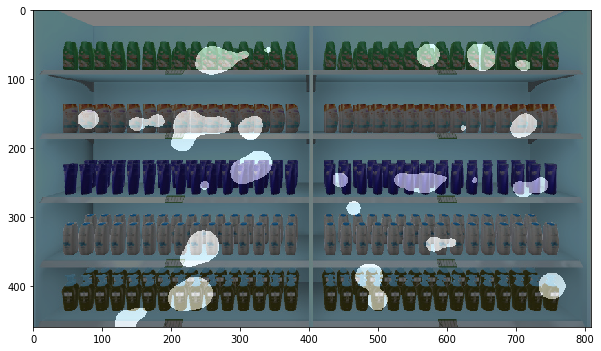

In [110]:
plt.figure(figsize=(10,10))
plt.imshow(blender, cmap='hsv')
plt.show()

In [33]:
def generate_gaussian_kernel(kernlen=100, nsig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-nsig, nsig, kernlen + 1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d / kern2d.sum()

In [62]:
x = np.linspace(-3, 3, 9 + 1)
kern1d = np.diff(st.norm.cdf(x))
kern2d = np.outer(kern1d, kern1d)
kern2d / kern2d.sum()

array([[7.20520416e-05, 3.23217816e-04, 9.43607348e-04, 1.79406915e-03,
        2.22245470e-03, 1.79406915e-03, 9.43607348e-04, 3.23217816e-04,
        7.20520416e-05],
       [3.23217816e-04, 1.44992083e-03, 4.23292246e-03, 8.04800389e-03,
        9.96969601e-03, 8.04800389e-03, 4.23292246e-03, 1.44992083e-03,
        3.23217816e-04],
       [9.43607348e-04, 4.23292246e-03, 1.23576627e-02, 2.34954734e-02,
        2.91056927e-02, 2.34954734e-02, 1.23576627e-02, 4.23292246e-03,
        9.43607348e-04],
       [1.79406915e-03, 8.04800389e-03, 2.34954734e-02, 4.46716573e-02,
        5.53382987e-02, 4.46716573e-02, 2.34954734e-02, 8.04800389e-03,
        1.79406915e-03],
       [2.22245470e-03, 9.96969601e-03, 2.91056927e-02, 5.53382987e-02,
        6.85519073e-02, 5.53382987e-02, 2.91056927e-02, 9.96969601e-03,
        2.22245470e-03],
       [1.79406915e-03, 8.04800389e-03, 2.34954734e-02, 4.46716573e-02,
        5.53382987e-02, 4.46716573e-02, 2.34954734e-02, 8.04800389e-03,
        1.7

In [41]:
(kern2d / kern2d.sum()).max()

1.0

In [48]:
st.norm.cdf(x)

array([0.00000000e+000, 6.35227312e-244, 1.00000000e+000, 1.00000000e+000])

In [50]:
np.diff(st.norm.cdf(x))

array([6.35227312e-244, 1.00000000e+000, 0.00000000e+000])